In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns; sns.set()
#sns.set_context('paper')
from matplotlib_visuals import *
import time
from IPython.display import clear_output

import asg
from utility import *

%matplotlib inline

IP = '192.168.0.117'
maxf = 7629

In [2]:
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = [8, 6]
plt.rc('xtick',  labelsize=12); plt.rc('ytick',  labelsize=12)

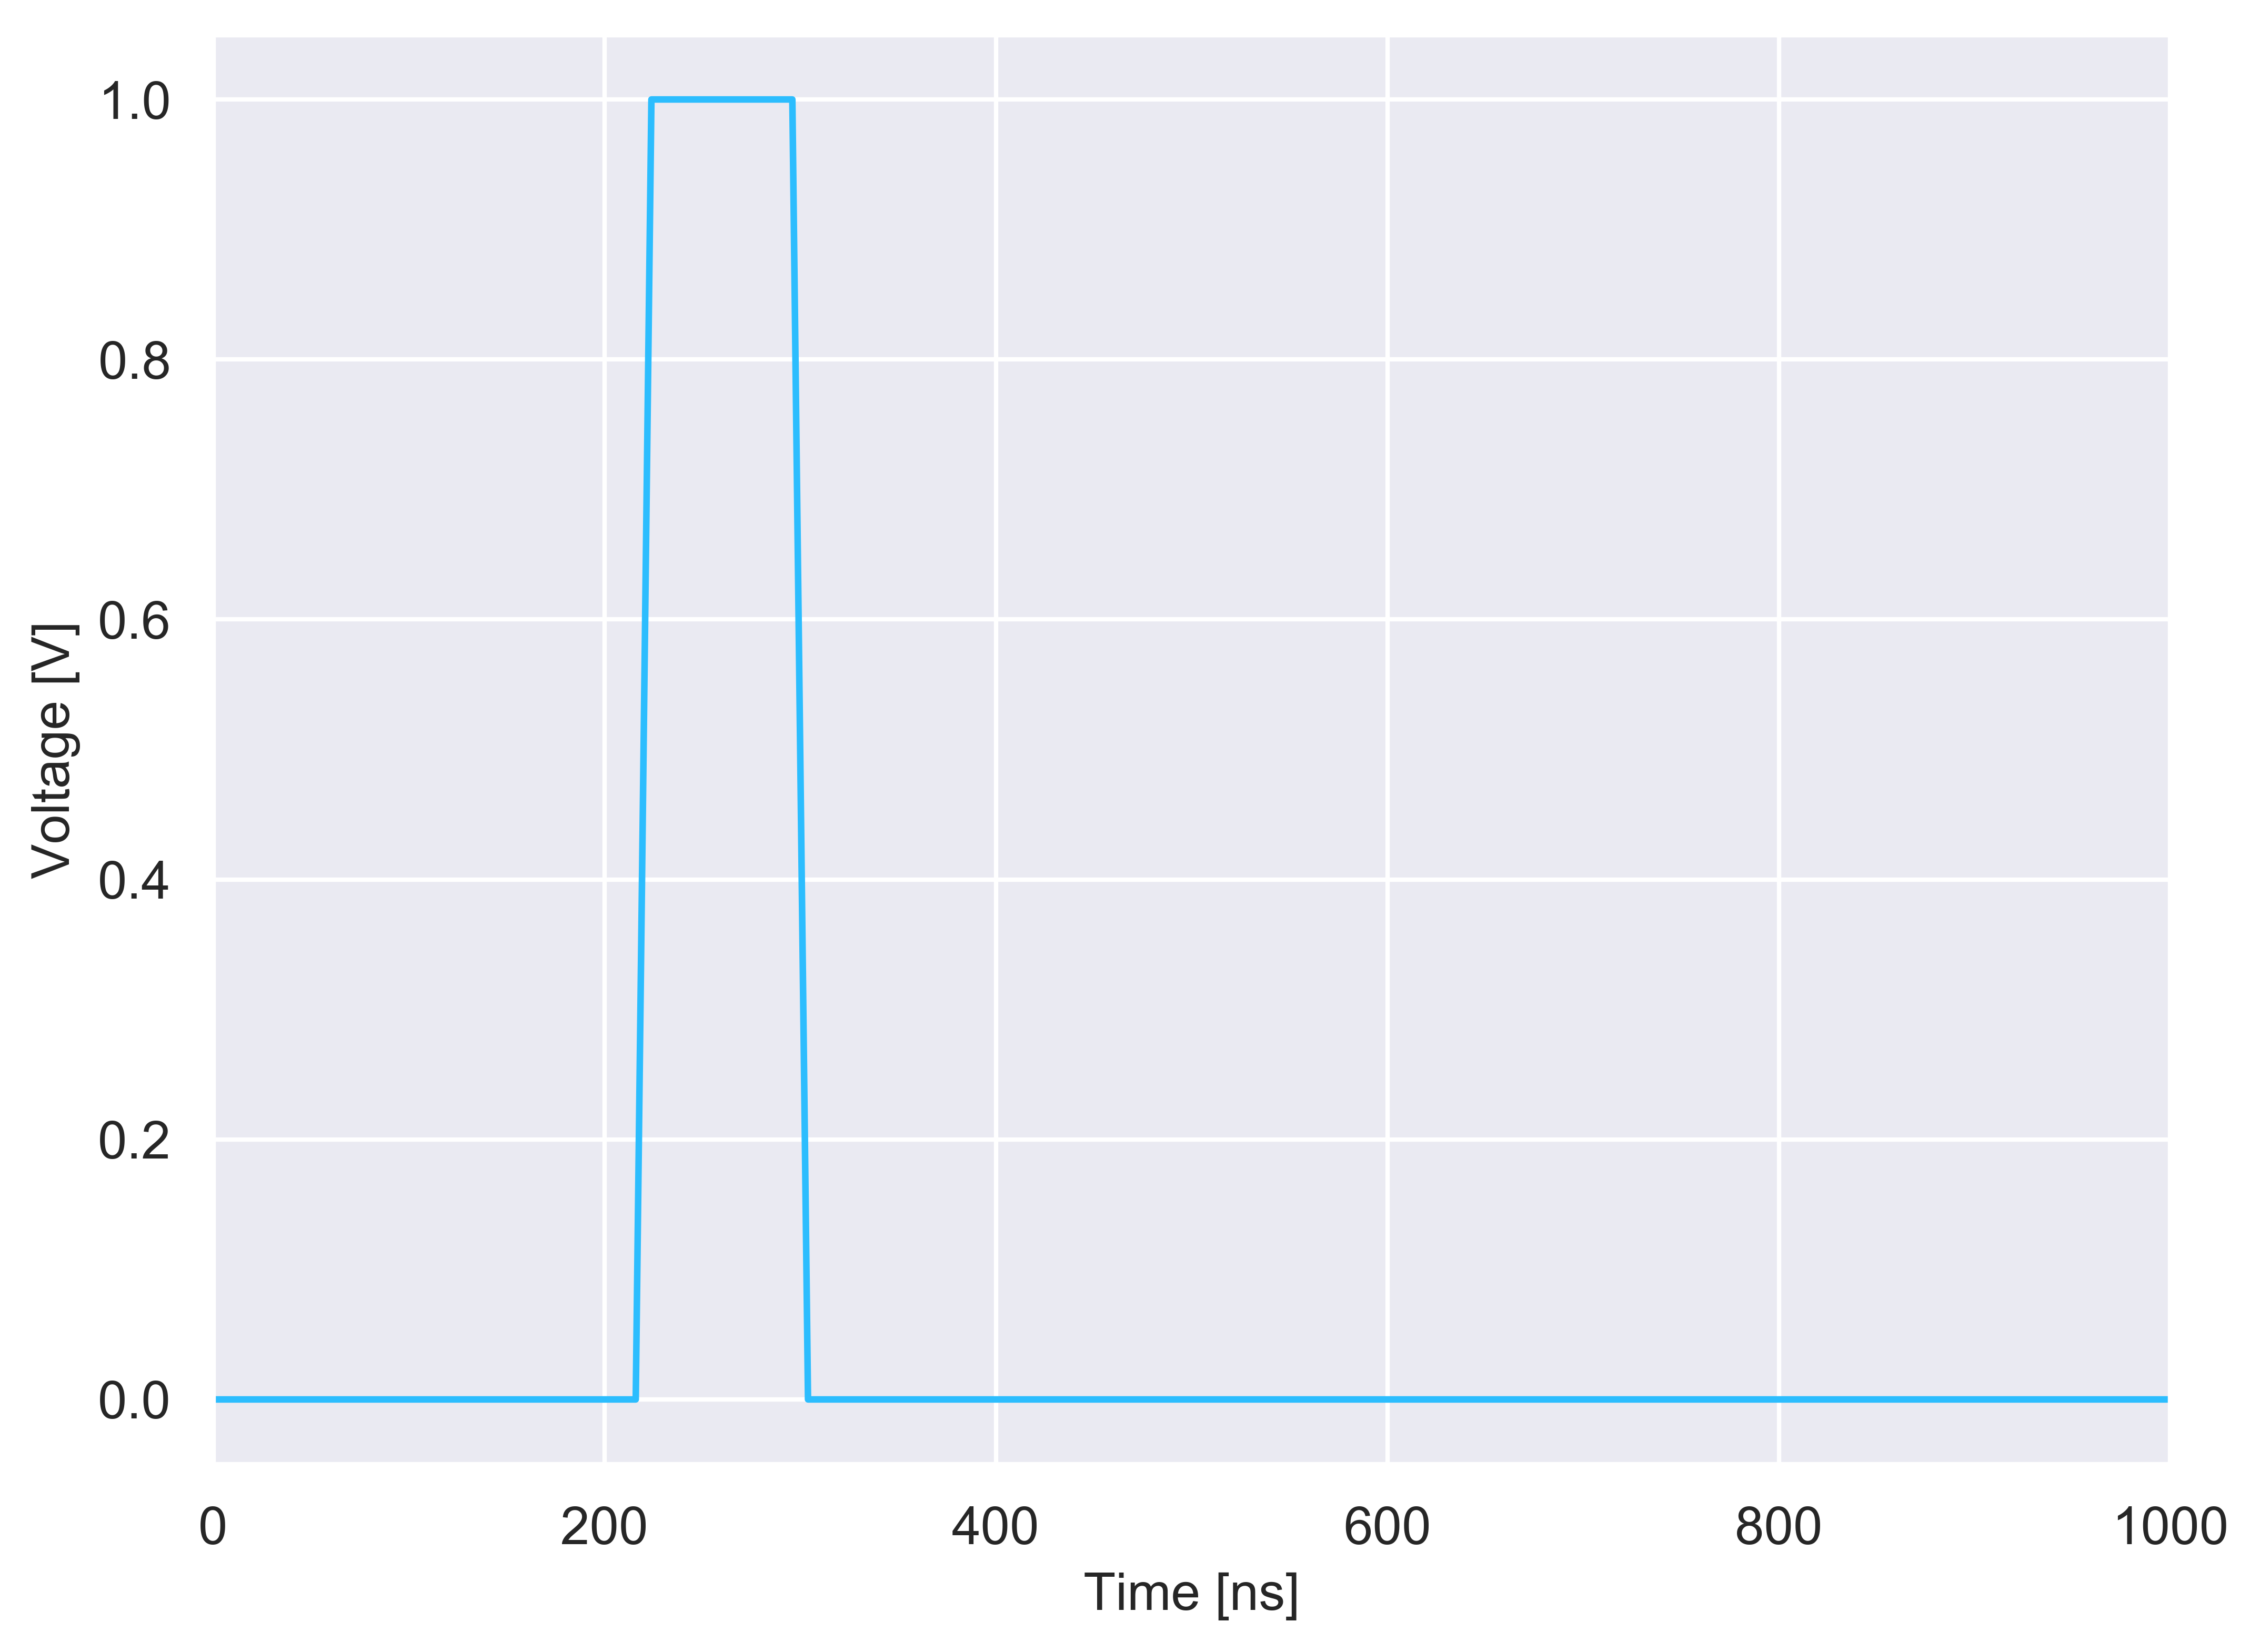

In [14]:
pulse = sloping_pulse(start=0, slope_length=0, pulse_width=80)
pulse_array = multi_pulse(800, 400, s_length=0, nr_of_pulses=65)
pulse_array2 = multi_pulse(800, 400, s_length=40, nr_of_pulses=65)

t = np.linspace(0, 2**14, 2**14)*8

plt.plot(t, shift(pulse, 200/8), color='#2CBDFE')
plt.xlim(left=0, right=1000)
plt.xlabel("Time [ns]")
plt.ylabel("Voltage [V]")

#plt.savefig('600dpi_images/ideal_50_ohm.eps', format='eps')

In [10]:
rp = asg.start(IP)

In [39]:
asg.reset(rp=rp)
#asg.setup(rp=rp, output=1, waveform='arbitrary', data=pulse_array2, frequency=maxf, amplitude=.5, burst_mode=True, bursts=1)
asg.setup(rp=rp, output=2, waveform='arbitrary', data=pulse, frequency=maxf, amplitude=1, burst_mode=True, bursts=1)
#asg.on(rp=rp, output=1)
asg.on(rp=rp, output=2)
asg.setup_scope(rp=rp, gain1='lv', gain2='lv', trigger_delay=int(2**14/2), trigger_source='awg_pe')
unloaded = asg.acquire(rp=rp, channel=2)

asg.off(rp=rp)

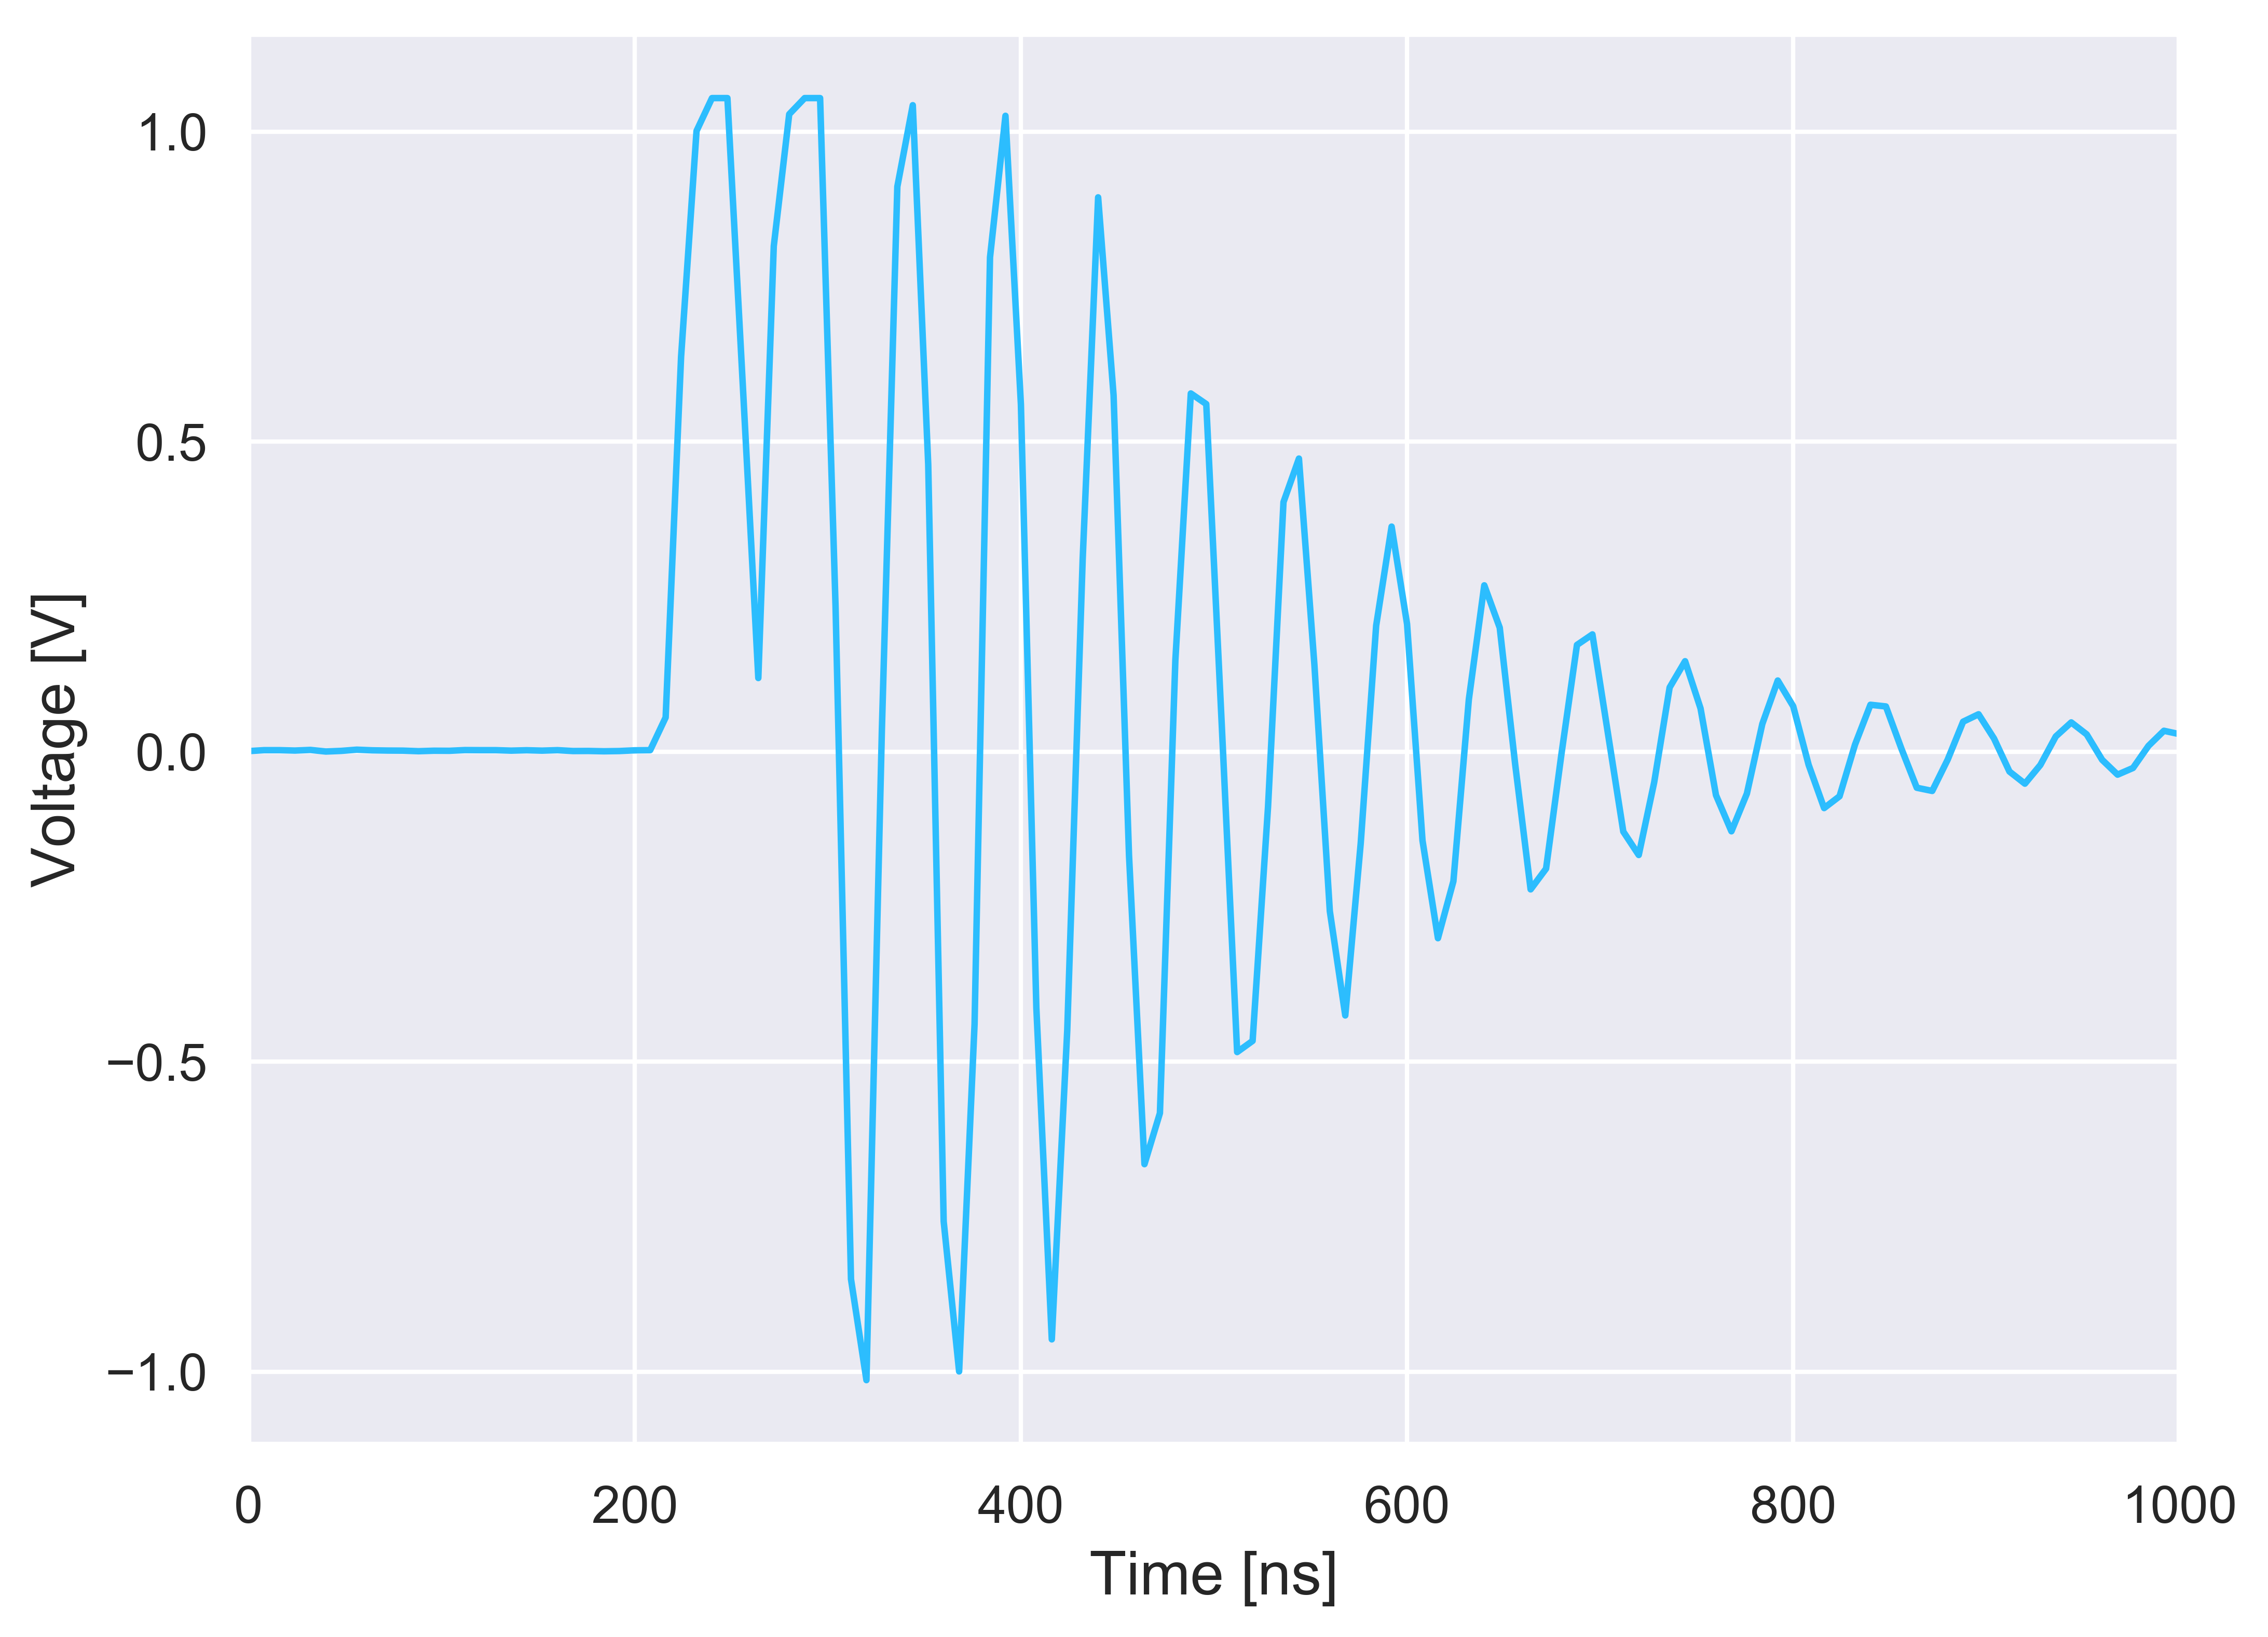

In [40]:
t = np.linspace(0, 2**14, 2**14)*8

#plt.plot(t, loaded, label='fixed pulse')
plt.plot(t, unloaded, color='#2CBDFE')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Time [ns]', fontsize=14)
plt.ylabel('Voltage [V]', fontsize=14)
#plt.xlim(left=0, right=5000)
plt.xlim(left=0, right=1000)
#plt.ylim(top=1, bottom=-0.5)

plt.savefig('600dpi_images/pulse_without_50_ohm.eps', format='eps')

Text(0, 0.5, 'Power [dBm]')

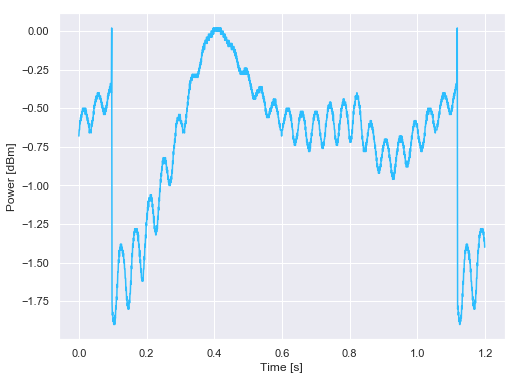

In [18]:
ch1, t = csv_to_array('scope_data/ringdown/NewFile2.csv', channels=1)
cable, tc = csv_to_array('scope_data/ringdown/just_cable.csv', channels=1)
tee, tt = csv_to_array('scope_data/ringdown/cable_n_tee.csv', channels=1)

# for i, item in enumerate(ch1):
#     if item < 0: 
#         ch1[i] = -item

    
plt.plot(tt, tee)
plt.xlabel('Time [s]')
plt.ylabel('Power [dBm]')

C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


[0.000000e+00 1.000001e-12 2.000002e-12 ... 9.999980e-07 9.999990e-07
 1.000000e-06]


(0, 0.001)

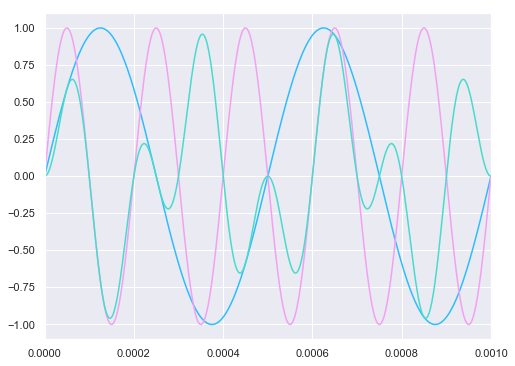

In [113]:
t = np.linspace(0, 1e-6, 1e6)
sine2 = np.sin(2*np.pi*2e9*t)
sine5 = np.sin(2*np.pi*5e9*t)

mix = sine2*sine5
print(t)
plt.plot(t*1e6, sine2)
plt.plot(t*1e6,sine5)
plt.plot(t*1e6, mix)
plt.xlim(left=0, right=0.001)